# Deep Neural Network to classify digits

![Image of Yaktocat](https://3.bp.blogspot.com/-mDyzBzA4btg/V4_Z0f2mc7I/AAAAAAAAE3M/dtU8hT661fQWtnRC_JvIH_4qifQomZ4PACLcB/s1600/MNIST_neuralnet_image.png)

## Machine Learning Project

Developed by [Sergio Castelblanco](www.linkedin.com/in/sergio-castelblanco)


version 1.1, July 19 2018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
from pandas import ExcelWriter
from pandas import ExcelFile
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

data = pd.read_csv("https://github.com/castellwhite/Machine-Learning-Projects/blob/master/Deep%20Leaning/train2.csv?raw=true",error_bad_lines = False,encoding = "ISO-8859-1", engine='python')
del data['Unnamed: 0']
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
!pip3 install tqdm
!pip3 install livelossplot

    100% |████████████████████████████████| 51kB 4.7MB/s 
  Running setup.py bdist_wheel for livelossplot ... - \ done
  Stored in directory: /content/.cache/pip/wheels/67/8b/e9/3990164e3b2a421145b9d9d76fc8aa889225d495b043faeb73
Successfully built livelossplot


In [3]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0
mean,4.511800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.154400,0.046900,0.047500,0.034800,0.026600,0.0062,0.0,0.0,0.0,0.0
std,2.880988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.263281,2.149922,3.170434,2.226092,2.449876,0.6200,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,172.000000,252.000000,177.000000,244.000000,62.0000,0.0,0.0,0.0,0.0


In [4]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

pca = PCA(n_components=80)
dataPCA=pca.fit(data.iloc[:,1:785])
dataPCAT=pca.fit_transform(data.iloc[:,1:785])
print("New Variable Z:")
print("-----------------------------------------------------------------------")
print(dataPCAT)
print(" ----------------------------------------------------------------------")
print("explained_variance_ratio = ",pca.explained_variance_ratio_.cumsum())
print(" ----------------------------------------------------------------------")
print("components_ = ",pca.components_.shape)

New Variable Z:
-----------------------------------------------------------------------
[[-491.09341809 -574.12911752  499.61806746 ...  -32.75994526
   -40.6743942    38.10313207]
 [ 348.46246847  -59.61895887 -532.16619178 ...   13.21061137
    21.40644616    1.91692847]
 [-495.16039588  121.71240738  446.15761337 ...  -50.26204268
   210.071692    -20.85303704]
 ...
 [1763.80118261   45.44836044  -83.8817417  ...   38.55419616
    71.04633134  102.91559921]
 [-460.47014852  384.55498925  -96.30321893 ...   25.96717138
  -117.30997983   42.93993614]
 [-126.87415673 -147.51427912  562.88679887 ...   35.91058495
   -28.55039401  118.89626033]]
 ----------------------------------------------------------------------
explained_variance_ratio =  [0.09560464 0.16692201 0.22791246 0.28229242 0.33115224 0.37520241
 0.40776153 0.43684942 0.46413097 0.48747842 0.50880692 0.52939637
 0.54677869 0.56368923 0.57945933 0.59470227 0.60804826 0.62087967
 0.63263933 0.64420031 0.65491032 0.66492694 0.

In [ ]:
y=data.iloc[:,0]
x=data.iloc[:,1:785]

In [6]:
from sklearn.preprocessing import LabelEncoder
from keras import backend as K
from keras.utils import np_utils

# Encode class values as integers.
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# Convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_Y)

Using TensorFlow backend.


In [7]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Convert lists to arrays.
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(x, y, test_size=0.3, random_state=22)

In [9]:
print(yTrain.shape)
print(xTrain.shape)

(7000, 10)
(7000, 784)


In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

outputClasses = 10
input_shape = (7000, 784)
# Creates a ANN model using keras.

model = Sequential()

neurons=200
neurons2=150
model=  Sequential()
model.add(Dense(neurons,input_shape=(784,)))
model.add(Activation('selu'))
model.add(Dropout(0.5,seed=123))
model.add(Dense(neurons2))
model.add(Activation('selu'))
model.add(Dropout(0.5,seed=123))
model.add(Dense(outputClasses))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_4 (Dense)                (None, 200)                 157000     
______________________________________________________________________
activation_4 (Activation)      (None, 200)                 0          
______________________________________________________________________
dropout_3 (Dropout)            (None, 200)                 0          
______________________________________________________________________
dense_5 (Dense)                (None, 150)                 30150      
______________________________________________________________________
activation_5 (Activation)      (None, 150)                 0          
______________________________________________________________________
dropout_4 (Dropout)            (None, 150)                 0          
______________________________________________________________________
dense_

In [ ]:
# Compile the convolutional neural network# Compi 
from keras.optimizers import adam
from keras.optimizers import SGD
from keras.optimizers import adamax
from keras.optimizers import adadelta
from keras.optimizers import RMSprop
from livelossplot import PlotLossesKeras

#Defines optimizer.
op = RMSprop(lr=0.0001)

# Compile the neural network.
model.compile(loss='categorical_crossentropy',
             optimizer=op,
              metrics=['accuracy'])

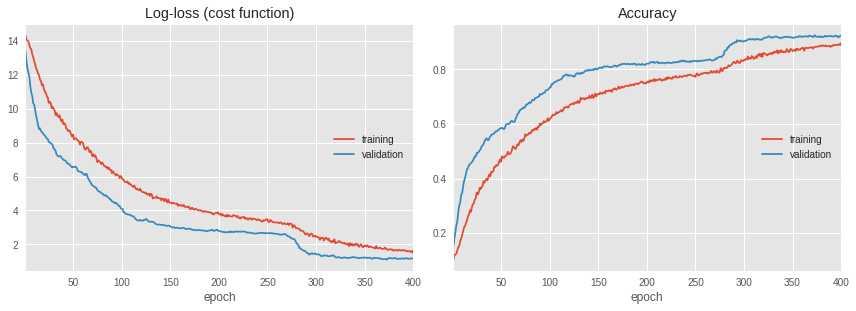

In [17]:
batch_size = 500
epochs = 400

training= model.fit(xTrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = False, 
                    validation_split = 0.2,callbacks=[PlotLossesKeras()])

In [19]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Perform the neural network over the test set.
print('Evaluating the test set...........')
score = model.evaluate(xTest, yTest)
print('---------------------------------------------------')
print('---------------------------------------------------')
print('---------------------------------------------------')
print('\nTest score:', score[0])
print('Test accuracy:', score[1])
yPred= model.predict(xTest)
print("AUC",roc_auc_score(yTest, yPred, average='macro'))


Evaluating the test set...........
3000/3000 [==============================] - 0s 62us/step
---------------------------------------------------
---------------------------------------------------
---------------------------------------------------

Test score: 1.3994145051638291
Test accuracy: 0.9079999998410543
AUC 0.9787317898148358


In [14]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['0','1','2','3','4','5','6','7','8','9']

# Predict class in test.
Y_pred = model.predict(xTest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(np.argmax(yTest,axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(np.argmax(yTest,axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
     0    1    2    3    4    5    6    7    8    9
0  278    0    0    0    1    1    5    0    3    0
1    0  341    3    3    0    0    0    1    1    0
2    2    2  250    4    7    0    7    3   10    0
3    2    1   13  239    1    6    4    2    1    6
4    0    2    6    0  290    0    4    0    1    8
5   13    1    5   45    7  160    7    1   26    4
6    7    1    0    2    2    5  294    0    2    0
7    4    4    7    0    6    0    0  269    3   11
8    2    4    1    9    7   13    8    4  238    7
9    4    2    0    4   20    1    1    2    3  276
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------
             precision    recall  f1-score   support

          0       0.89      0.97      0.93       288
          1       0.